In [1]:
import pandas as pd
import sqlalchemy as sql
import matplotlib.pyplot as plt
%matplotlib notebook

# Data Dictionary

#### orders (415k rows): fact table, one record per order, includes useful time dimensions
- order_id: order identifier
- user_id: customer identifier
- order_number: the order sequence number for this user (1 = first, n = nth)
- order_dow: the day of the week the order was placed on
- Order_hour_of_day: hour of day the order was placed
- Days_since_prior_order: Number of days since that customer placed their previous order (NA for order_number = 1)

#### order_products (3.9M rows): fact table, one record per order, per product
_except for last order by a customer_
- order_id: foreign key
- product_id: foreign key
- add_to_cart_order: order in which each product was added to cart
- reordered: 1 if this product has been ordered by this user in the past, 0 otherwise

#### products (50k rows): Dimension table for product info
- product_id: product identifier
- product_name: name of the product
- aisle_id: foreign key
- department_id: foreign key

#### aisles (134 rows): Dimension table for aisle info
- aisle_id: aisle identifier
- aisle: the name of the aisle

#### departments (21 rows): Dimension table for department info
- department_id: department identifier
- department: the name of the department


In [149]:
engine = sql.create_engine('sqlite:///instacart.db')
db = {}

In [ ]:
for table in ['orders', 'order_products', 'products', 'aisles', 'departments',]:
    db[table] = pd.read_sql_table(table, engine, index_col=0,)

In [136]:
# aliases
orders = db['orders']
orders.set_index('order_id', inplace=True)

ops = db['order_products']   # default index vs. multi-index on order_id + add_to_cart_order

products = db['products']
del(products['index'])       # index is one off from xxxx_id, confusing
products.set_index('product_id', inplace=True)

del(db['departments']['index'])
db['departments'].set_index('department_id', inplace=True)

In [137]:
db['aisles']['department_id'] = None

In [148]:
for el in db['aisles']['aisle_id']:
    dept = products[products.aisle_id == el]['department_id']
    db['aisles'].loc[el, 'department_id'] = dept

ValueError: Incompatible indexer with Series

In [146]:
products[products['aisle_id'] == 1]

,product_name,aisle_id,department_id
product_id,,,
209,Italian Pasta Salad,1,20
554,Turkey Chili,1,20
886,Whole Grain Salad with Roasted Pecans & Mango ...,1,20
1600,Mediterranean Orzo Salad,1,20
2539,Original Potato Salad,1,20
2941,Broccoli Salad,1,20
3991,Moms Macaroni Salad,1,20
4112,Chopped Salad Bowl Italian Salad with Salami &...,1,20
4369,American Potato Salad,1,20


In [143]:
db['aisles']

,index,aisle_id,aisle,department_id
0,0.0,1.0,prepared soups salads,None
1,1.0,2.0,specialty cheeses,20
2,2.0,3.0,energy granola bars,16
3,3.0,4.0,instant foods,19
4,4.0,5.0,marinades meat preparation,9
5,5.0,6.0,other,13
6,6.0,7.0,packaged meat,2
7,7.0,8.0,bakery desserts,12
8,8.0,9.0,pasta sauce,3
9,9.0,10.0,kitchen supplies,9


In [134]:
db['aisles'].set_index('department_id').join(db['departments'])

,aisle,department
department_id,,
1,frozen meat seafood,frozen
1,ice cream ice,frozen
1,frozen meals,frozen
1,frozen vegan vegetarian,frozen
1,frozen breakfast,frozen
1,frozen breads doughs,frozen
1,frozen pizza,frozen
1,frozen juice,frozen
1,frozen produce,frozen


In [128]:
db['aisles']

,aisle,department_id
aisle_id,,
1,prepared soups salads,20
2,specialty cheeses,16
3,energy granola bars,19
4,instant foods,9
5,marinades meat preparation,13
6,other,2
7,packaged meat,12
8,bakery desserts,3
9,pasta sauce,9


In [51]:
orders.count()

user_id                   414772
order_number              414772
order_dow                 414772
order_hour_of_day         414772
days_since_prior_order    389772
dtype: int64

In [55]:
len(db['order_products']['order_id'].unique())

389772

In [76]:
db['orders'][db['orders']['user_id'] == 2]

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,
2168274,2,1,2,11,NaN
1501582,2,2,5,10,10.0
1901567,2,3,1,10,3.0
738281,2,4,2,10,8.0
1673511,2,5,3,11,8.0
1199898,2,6,2,9,13.0
3194192,2,7,2,12,14.0
788338,2,8,1,15,27.0
1718559,2,9,2,9,8.0


In [79]:
db['order_products'][ops['order_id'] == 1492625]

,order_id,product_id,add_to_cart_order,reordered


# Analysis:

## Note on data:
Order_products does not include the last order by any customer

## Topics

Breakdowns by:

1. Product (most popular, least)
2. Departments ( -> Aisles)
3. Customers:
- best: what is predictive in first order of repeat customers
- worst: what is predictive in first order of single-visit customers
4. Timing (week, day)
5. Item order: what % of times that a product is ordered is it the first item ordered? i.e. types of items that are top-of mind
6. Products: what are predictions for next product added to cart? Could we increase sales by showing this item?

In [37]:
ops[:12]

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,4,46842,1,0


Text(0.5,0,'order size')

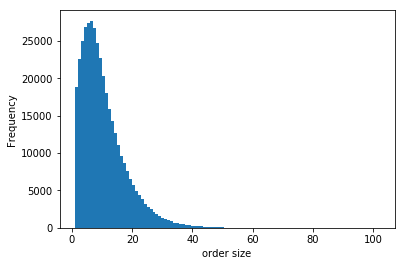

In [38]:
ax = ops.groupby('order_id').size().plot.hist(bins=102)
ax.set_xlabel('order size')

In [39]:
len(ops.groupby('order_id'))

389772

In [40]:
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2168274,2,1,2,11,NaN
1,1501582,2,2,5,10,10.0
2,1901567,2,3,1,10,3.0
3,738281,2,4,2,10,8.0
4,1673511,2,5,3,11,8.0
5,1199898,2,6,2,9,13.0
6,3194192,2,7,2,12,14.0
7,788338,2,8,1,15,27.0
8,1718559,2,9,2,9,8.0
9,1447487,2,10,1,11,6.0
